<a href="https://colab.research.google.com/github/fuadsalimzade/git-repository/blob/main/NN_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import markdown
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import ModelCheckpoint

In [14]:
data = pd.read_csv("adult_onehot_tr.csv")

In [15]:
data.head()

,Unnamed: 0,age,educationnum,capitalgain,capitalloss,hoursperweek,workclass_Federal.gov,workclass_Local.gov,workclass_Missing,workclass_No.income,...,race_Asian.Pac.Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,nativecountry_Missing,nativecountry_NonUS,nativecountry_US,income_X.50K
0,1,39,13,7.684784,0.0,40,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,2,50,13,0.000000,0.0,13,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,3,38,9,0.000000,0.0,40,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,4,53,7,0.000000,0.0,40,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,5,28,13,0.000000,0.0,40,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [16]:
data = data.iloc[:, 1:]

In [17]:
data.shape

(32561, 52)

In [18]:
def NN_results(history):
  # Getting necessary data for plotting
  loss = history.history['loss'][10:]
  val_loss = history.history['val_loss'][10:]
  epochs = range(1, len(loss) + 1)

  # Plotting training and validation loss
  # "b" is for "solid blue line"
  plt.plot(epochs, loss, 'b', label='Training loss')
  # r is for "solid red line"
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()
  plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               13312     
                                                                 
 layer_normalization (LayerN  (None, 256)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 layer_normalization_1 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

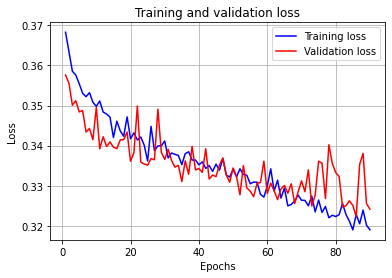

204/204 [==============================] - 2s 5ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               13312     
                                                                 
 layer_normalization_6 (Laye  (None, 256)              512       
 rNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 layer_normalization_7 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 

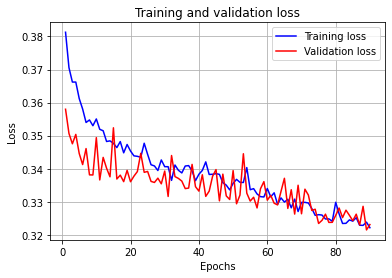

204/204 [==============================] - 1s 4ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               13312     
                                                                 
 layer_normalization_12 (Lay  (None, 256)              512       
 erNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 layer_normalization_13 (Lay  (None, 128)              256       
 erNormalization)                                                
                                                                 

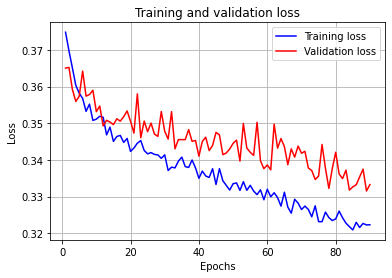

204/204 [==============================] - 1s 4ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               13312     
                                                                 
 layer_normalization_18 (Lay  (None, 256)              512       
 erNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 layer_normalization_19 (Lay  (None, 128)              256       
 erNormalization)                                                
                                                                 

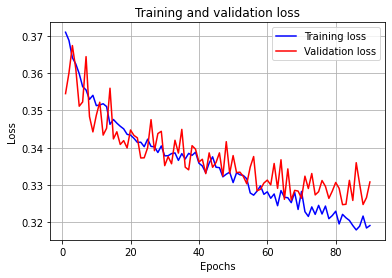

204/204 [==============================] - 1s 4ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               13312     
                                                                 
 layer_normalization_24 (Lay  (None, 256)              512       
 erNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 layer_normalization_25 (Lay  (None, 128)              256       
 erNormalization)                                                
                                                                 

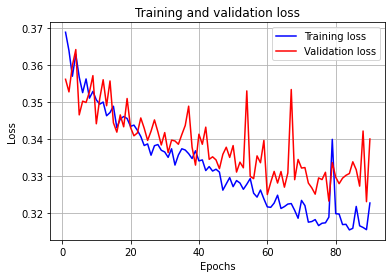

204/204 [==============================] - 1s 3ms/step


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import time


num_folds = 5

X = data.iloc[:, 0:51]
y = data.iloc[:, -1]

# Initialize the cross validation folds
kf = KFold(n_splits=num_folds, shuffle=True)

# Initialize the accuracy scores for each fold
scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):

    # Split the data into training and testing sets for this fold
    train_x, test_x = X.iloc[list(train_index),:], X.iloc[list(test_index),:]
    train_y, test_y = y[list(train_index)], y[list(test_index)]

    checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True)


      #Sequential model initialized
    model = tf.keras.Sequential(layers=None, name=None)

    model.add(tf.keras.layers.Dense(256, input_shape=(51,), activation= 'elu', name = 'First_layer'))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(128, activation = 'elu', name = 'Second_layer'))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(64, activation = 'elu', name = 'Add_layer'))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(16, activation = 'elu', name = 'New_layer'))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Dropout(0.2))


    model.add(tf.keras.layers.Dense(8, activation= 'relu', name = 'Third_layer', kernel_regularizer='l1'))
    model.add(tf.keras.layers.LayerNormalization())
    model.add(tf.keras.layers.Dropout(0.1))

    model.add(tf.keras.layers.Dense(8, activation= 'relu', name = 'Fourth_layer', kernel_regularizer='l1'))
    model.add(tf.keras.layers.LayerNormalization())
      #Final layer
    model.add(tf.keras.layers.Dense(1, activation= 'sigmoid', name = 'Output_Layer'))

    model.summary()
    
    model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy()])

    start_time = time.time()

    history = model.fit(train_x, train_y, batch_size= 256, validation_split= 0.1, verbose = 0, epochs= 100, callbacks=[checkpoint])

    end_time = time.time()
    runtime = end_time - start_time
    print(f"Runtime: {runtime:.2f} seconds")

    NN_results(history)

    model.load_weights('best_weights.h5')
    #score = model.evaluate(test_x, test_y, verbose = 0) 
    
    preds = model.predict(test_x)
    for i, x in enumerate(preds):
      if x >= 0.5:
        preds[i] = 1
      else:
        preds[i] = 0

    acc = accuracy_score(test_y, preds)
    f1 = f1_score(test_y, preds)
    c = confusion_matrix(test_y, preds)
    precision = c[1][1] / (c[0][1] + c[1][1])
    recall = c[1][1] / (c[1][1] + c[1][0])
    auc_score = roc_auc_score(test_y, preds)

    scores.append([acc, auc_score, f1, precision, recall])

In [20]:
for i in range(len(scores)):
  print("Accuracy:", scores[i][0], "AUC:", scores[i][1], "F1 Score:", scores[i][2], "Precision:", scores[i][3], "Recall:", scores[i][4])

Accuracy: 0.8519883310302472 AUC: 0.7531692214528842 F1 Score: 0.6484318016046682 Precision: 0.7690311418685121 Recall: 0.5605296343001261
Accuracy: 0.8584152334152334 AUC: 0.7734957236528478 F1 Score: 0.6778476589797345 Precision: 0.768012668250198 Recall: 0.6066291432145091
Accuracy: 0.8593366093366094 AUC: 0.763816054860831 F1 Score: 0.6634827332843498 Precision: 0.7731164383561644 Recall: 0.581081081081081
Accuracy: 0.8553439803439803 AUC: 0.7692499823139682 F1 Score: 0.6633309506790565 Precision: 0.731284475965327 Recall: 0.6069326357096141
Accuracy: 0.851504914004914 AUC: 0.7751611619803561 F1 Score: 0.6712002720163209 Precision: 0.7214912280701754 Recall: 0.6274634456452638
